In [5]:
import json
from collections import Counter as C
import numpy as np
import pandas as pd

In [6]:
train_data = json.load(open("../top_150_50_new/ft_train.json"))

In [7]:
docs = []
objs = []
for x in train_data:
    doc = []
    for y in x[0]:
        try:
            e1, r, e2 = y.strip().split(",")
            doc += [e1, e2]
        except:
            doc += [y]
    doc += [x[1].split(",")[1]]
    doc  = list(set(doc))
    objs += doc
    docs.append(doc)
objs = list(set(objs))

In [8]:
objs

['surfer',
 'chair',
 'leaf',
 'face',
 'sidewalk',
 'track',
 'cow',
 'letter',
 'wave',
 'pole',
 'elephant',
 'flower',
 'ocean',
 'sink',
 'banana',
 'mirror',
 'skateboard',
 'stripe',
 'hair',
 'shelf',
 'short',
 'helmet',
 'donut',
 'box',
 'building',
 'bush',
 'bowl',
 'road',
 'mountain',
 'airplane',
 'dirt',
 'book',
 'floor',
 'bottle',
 'food',
 'neck',
 'shoe',
 'plant',
 'surfboard',
 'tower',
 'laptop',
 'bathroom',
 'street',
 'skier',
 'dog',
 'trunk',
 'motorcycle',
 'paper',
 'cloud',
 'glove',
 'cat',
 'shirt',
 'pillow',
 'hill',
 'ground',
 'plane',
 'lady',
 'tile',
 'bus',
 'head',
 'racket',
 'top',
 'clock',
 'orange',
 'animal',
 'ear',
 'line',
 'branch',
 'hat',
 'board',
 'bike',
 'number',
 'eye',
 'hand',
 'foot',
 'tail',
 'shadow',
 'vase',
 'player',
 'ski',
 'house',
 'sign',
 'lamp',
 'zebra',
 'car',
 'train',
 'rock',
 'vehicle',
 'sand',
 'bed',
 'cup',
 'pant',
 'arm',
 'post',
 'water',
 'door',
 'glass',
 'jacket',
 'boat',
 'reflection',
 

In [9]:
obj_probs = {}
for obj in objs:
    obj_probs[obj] =  len([x for x in docs if obj in x]) / len(docs)

In [10]:
obj_probs

{'surfer': 0.01427519279091933,
 'chair': 0.045533316003812496,
 'leaf': 0.07596828697686508,
 'face': 0.06832163590676718,
 'sidewalk': 0.05645091413222424,
 'track': 0.047634520405510784,
 'cow': 0.017892730266008145,
 'letter': 0.026102590763365394,
 'wave': 0.032189584957975914,
 'pole': 0.08357161424486613,
 'elephant': 0.026600814487479422,
 'flower': 0.03364093232822112,
 'ocean': 0.02475955289836236,
 'sink': 0.01351702625422407,
 'banana': 0.0094445888571181,
 'mirror': 0.0363919937613725,
 'skateboard': 0.029806775842647952,
 'stripe': 0.04620483493631401,
 'hair': 0.1292782254570661,
 'shelf': 0.017416168442942553,
 'short': 0.06411922710337059,
 'helmet': 0.04317216878953297,
 'donut': 0.005112208647430899,
 'box': 0.019582358547786154,
 'building': 0.15759033012737197,
 'bush': 0.03364093232822112,
 'bowl': 0.01754613984923317,
 'road': 0.0711593449441123,
 'mountain': 0.02742396672731999,
 'airplane': 0.014621783207694307,
 'dirt': 0.034399098864916385,
 'book': 0.0160947

In [11]:
frozenset(("a", "b")) == frozenset(("b", "a"))

True

In [12]:
doc_tuples = []
for doc in docs:
    doc_tuples += [frozenset((doc[x],doc[y])) for x in range(len(doc)) for y in range(x+1, len(doc))]

In [13]:
tuple_counter = C(doc_tuples)

In [14]:
np.log(2995 / len(doc_tuples))

-6.092203129286799

In [18]:
obj_pmi = {}
obj_pmi_mat = np.zeros((len(objs), len(objs)))
for x in range(len(objs)):
    for y in range(len(objs)):
        if x == y :
            obj_pmi_mat[x][y] = 0
            if objs[x] not in obj_pmi:
                obj_pmi[objs[x]] = {}
            obj_pmi[objs[x]][objs[y]] = 0
        else:
            if objs[x] not in obj_pmi:
                obj_pmi[objs[x]] = {}
            if frozenset((objs[x], objs[y])) not in tuple_counter:
                obj_pmi_mat[x][y] = -8
                obj_pmi[objs[x]][objs[y]] = -8
            else:  
                obj_pmi_mat[x][y] = np.log(tuple_counter[frozenset((objs[x], objs[y]))] / len(doc_tuples))  - np.log(obj_probs[objs[x]]) - np.log(obj_probs[objs[y]])
                obj_pmi[objs[x]][objs[y]] = np.log(tuple_counter[frozenset((objs[x], objs[y]))] / len(doc_tuples))  - np.log(obj_probs[objs[x]]) - np.log(obj_probs[objs[y]])

            

In [12]:
df = pd.DataFrame(obj_pmi_mat, columns=objs)

In [13]:
df

,dog,lady,toilet,door,reflection,background,helmet,light,pillow,hair,...,snow,zebra,handle,dirt,book,window,sign,building,sink,shirt
0,0.000000,-3.569754,-4.566932,-3.543403,-3.057591,-3.732687,-4.481539,-4.195631,-2.448861,-3.476396,...,-3.707504,-8.000000,-3.403366,-3.538753,-3.002362,-3.800771,-4.302344,-4.213424,-4.801898,-3.728944
1,-3.569754,0.000000,-5.120796,-3.705224,-3.484702,-3.323740,-3.444314,-3.945682,-3.645609,-2.249673,...,-3.667850,-6.392680,-3.957229,-4.854757,-2.996610,-3.734246,-3.517644,-3.631287,-4.480292,-2.533418
2,-4.566932,-5.120796,0.000000,-2.504177,-2.343918,-4.955225,-6.597894,-3.100800,-5.355737,-4.804294,...,-6.793260,-8.000000,-1.373741,-3.192675,-3.213299,-3.650259,-3.908687,-5.590112,-0.138331,-4.820683
3,-3.543403,-3.705224,-2.504177,0.000000,-2.871888,-3.461691,-5.009051,-2.516506,-3.659263,-3.893559,...,-4.344215,-4.980034,-1.917685,-3.981107,-3.781188,-2.164758,-2.665170,-2.621816,-2.395553,-3.846634
4,-3.057591,-3.484702,-2.343918,-2.871888,0.000000,-3.404289,-4.556336,-2.755936,-3.201701,-3.707197,...,-4.705182,-3.531719,-3.017667,-3.710131,-3.436105,-2.872637,-3.620667,-3.331141,-1.834443,-3.992446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,-3.800771,-3.734246,-3.650259,-2.164758,-2.872637,-3.511068,-4.499506,-2.545772,-3.412271,-4.038132,...,-4.217947,-6.243899,-3.319397,-4.291032,-3.569964,0.000000,-2.574364,-2.156722,-3.249706,-3.884169
146,-4.302344,-3.517644,-3.908687,-2.665170,-3.620667,-3.269835,-3.519218,-2.439418,-5.872850,-4.081065,...,-3.472115,-6.374493,-3.879323,-3.961102,-4.924334,-2.574364,0.000000,-2.370613,-4.199742,-3.609298
147,-4.213424,-3.631287,-5.590112,-2.621816,-3.331141,-2.844562,-3.959092,-2.628969,-6.159682,-4.048500,...,-3.696150,-4.559411,-4.123596,-3.996619,-4.787682,-2.156722,-2.370613,0.000000,-6.153582,-3.689976
148,-4.801898,-4.480292,-0.138331,-2.395553,-1.834443,-5.855166,-8.000000,-2.387537,-4.155618,-4.346112,...,-8.000000,-8.000000,-1.591007,-4.813935,-3.584396,-3.249706,-4.199742,-6.153582,0.000000,-4.551744


In [14]:
np.min(obj_pmi_mat)

-8.0

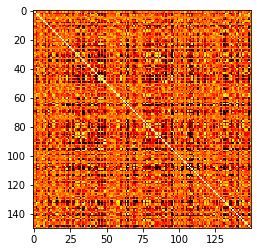

In [15]:
import matplotlib.pyplot as plt

plt.imshow(obj_pmi_mat, cmap='hot', interpolation='nearest')
plt.show()

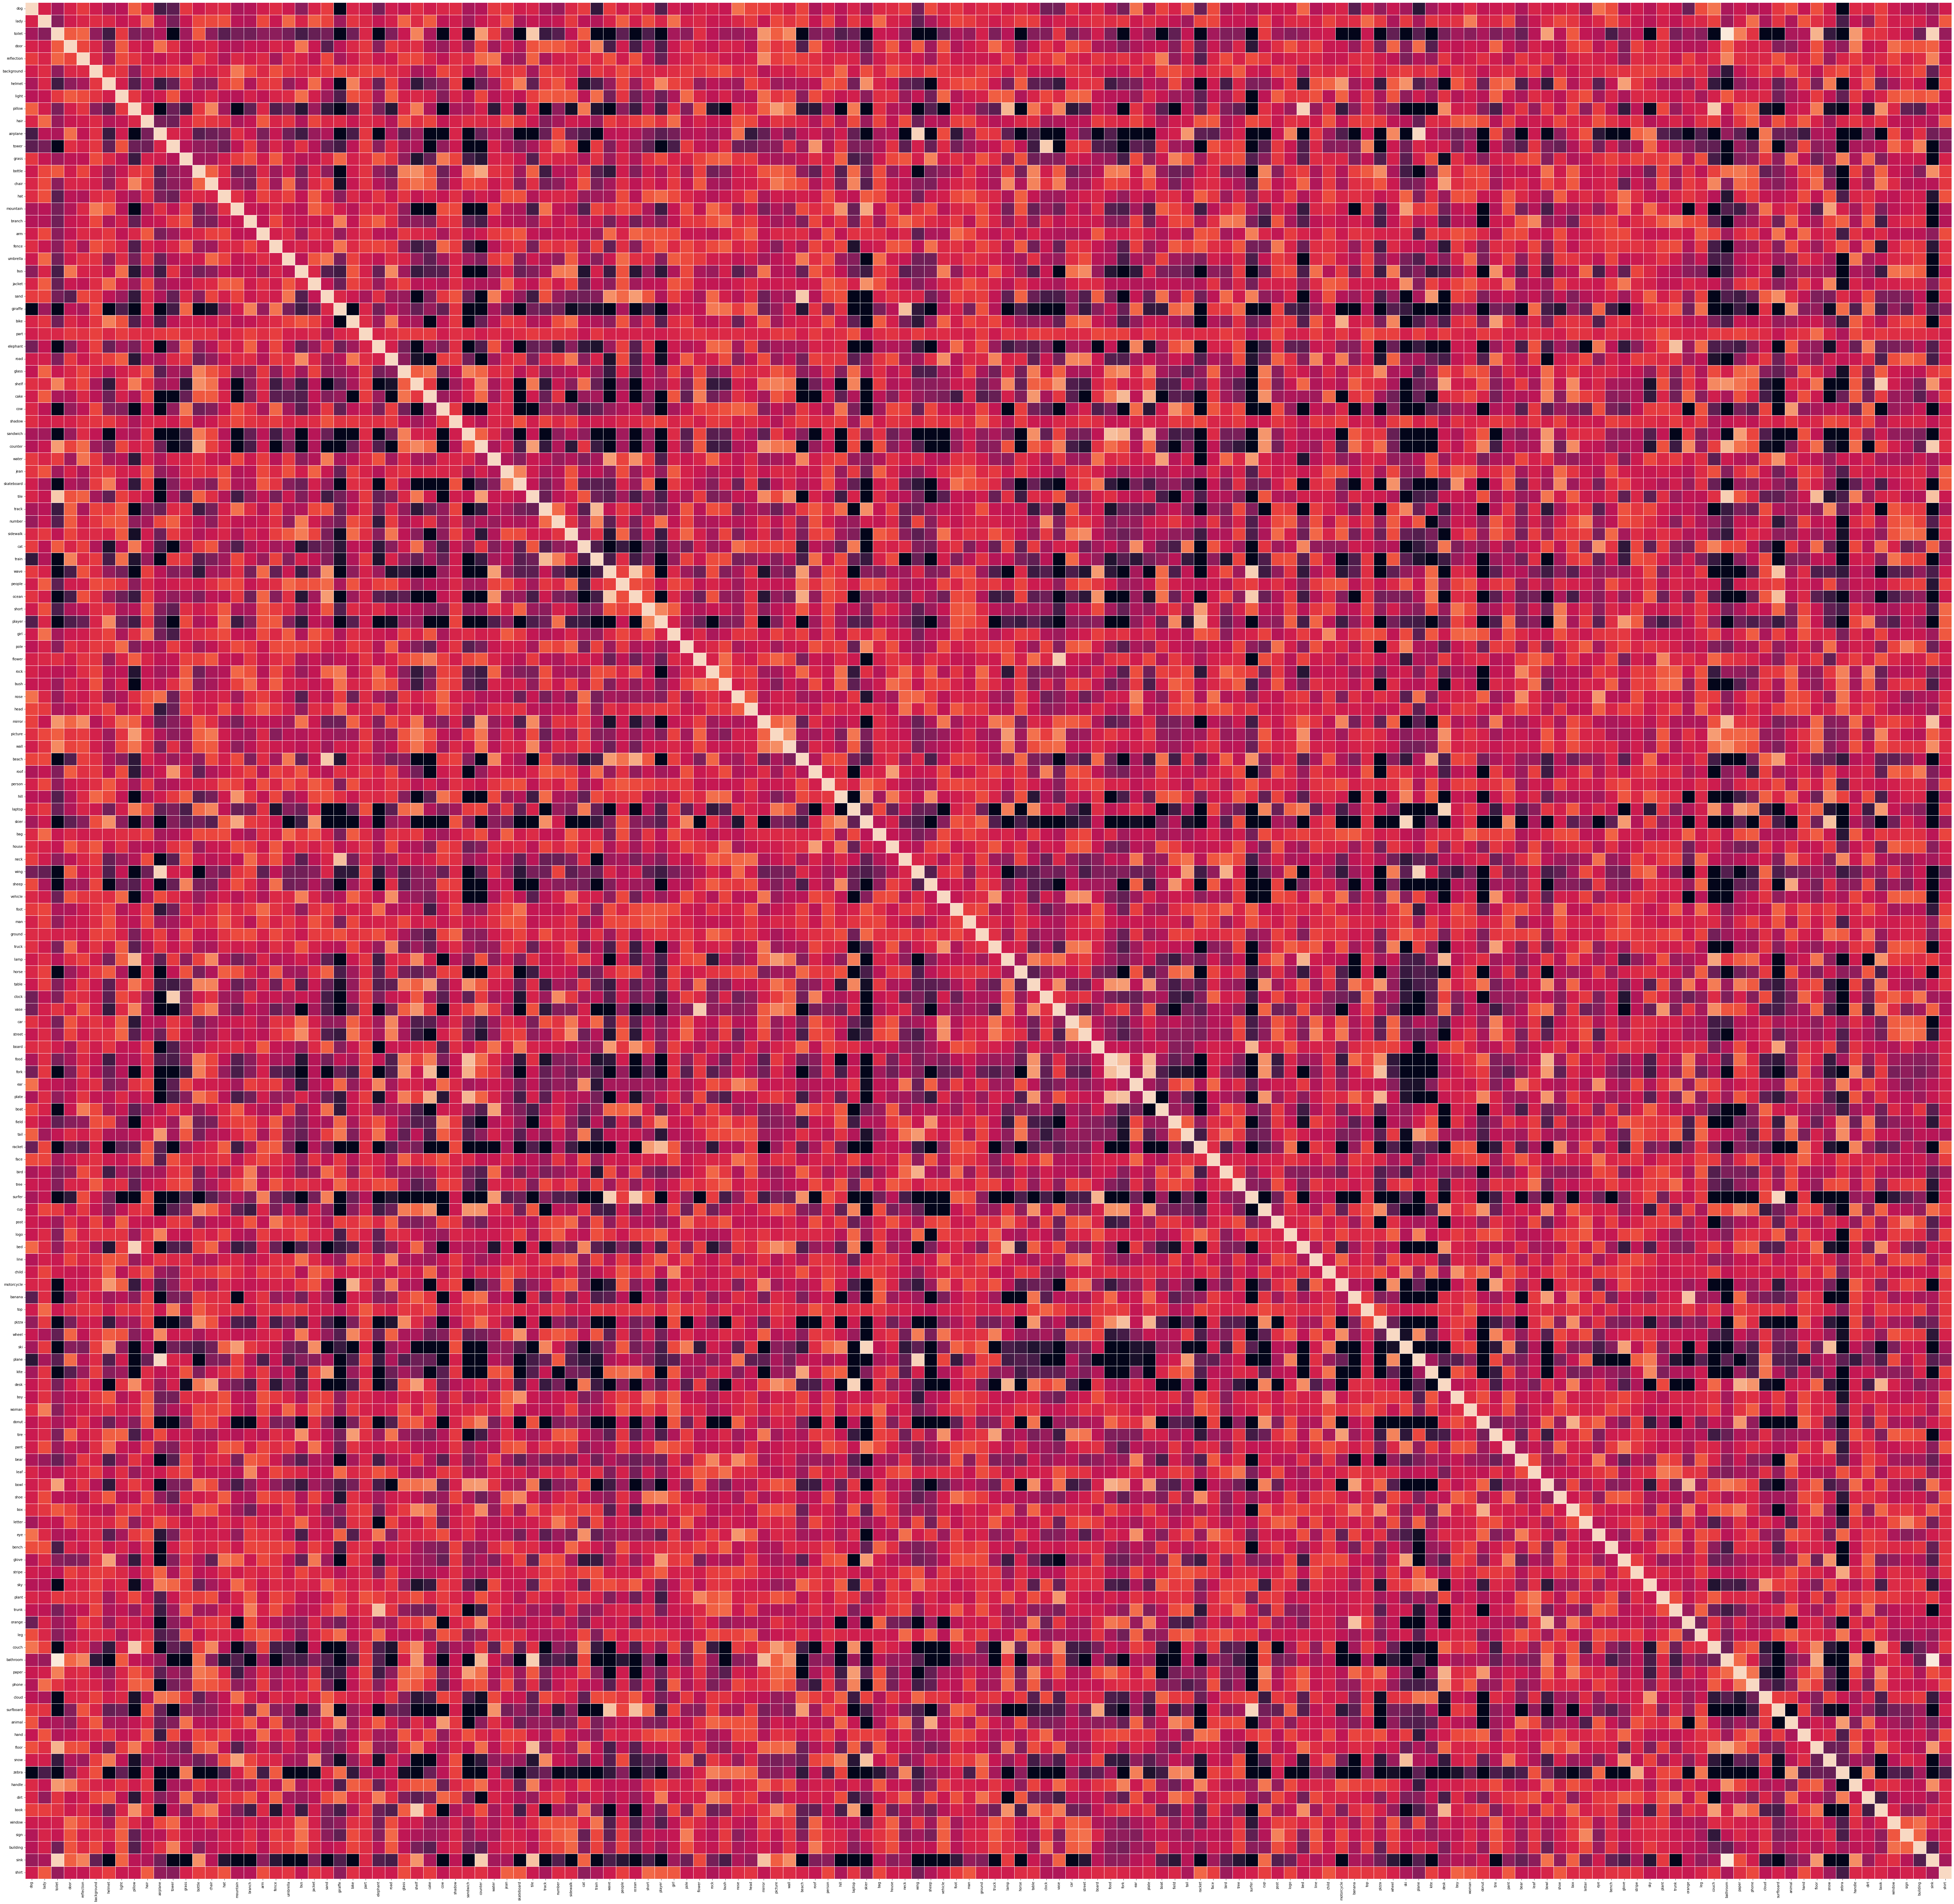

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# uniform_data = np.random.rand(10, 12)
fig = plt.figure(figsize=(100,100))
fig.patch.set_facecolor('white')
ax = sns.heatmap(df, linewidth=0.5, xticklabels=True, yticklabels=objs, cbar=False)
# plt.show()
plt.savefig("pmi_plot.png", dpi=300, bbox_inches='tight')

In [19]:
json.dump(obj_pmi, open("object_pmi_scores.json", "w"))

In [2]:
import json

In [3]:
train_data = json.load(open("../top_150_50_new/ft_train.json"))

In [8]:
objs = []
rels= []
e_t = []
r_t = []
for x in train_data:
    for y in x[0]:
        try:
            e,r,o = y.split(",")
            objs.append(e)
            objs.append(o)
            rels.append(r)
        except:
            e = y
            objs.append(e)
    r,e = x[1].split(",")
    r_t.append(r)
    e_t.append(e)

In [7]:
import numpy as np 
from collections import Counter as X

In [17]:
X(rels).most_common()

[('on', 140859),
 ('have', 64438),
 ('in', 55180),
 ('wear', 38689),
 ('of', 31406),
 ('behind', 13316),
 ('with', 11324),
 ('hold', 9674),
 ('near', 8038),
 ('next_to', 6463),
 ('on_top_of', 5915),
 ('have_a', 5687),
 ('on_a', 5627),
 ('sit_on', 4419),
 ('by', 4341),
 ('of_a', 4303),
 ('under', 4065),
 ('in_front_of', 3804),
 ('ride', 3660),
 ('above', 3259),
 ('stand_on', 2761),
 ('wear_a', 2622),
 ('on_side_of', 2599),
 ('stand_in', 2146),
 ('eat', 2058),
 ('beside', 2033),
 ('walk_on', 1893),
 ('at', 1671),
 ('carry', 1567),
 ('over', 1419),
 ('cover', 1412),
 ('attach_to', 1399),
 ('in_a', 1387),
 ('hang_on', 1156),
 ('lay_on', 1083),
 ('look_at', 1037),
 ('around', 966),
 ('inside', 961),
 ('sit_in', 934),
 ('below', 918),
 ('watch', 734),
 ('along', 716),
 ('on_front_of', 702),
 ('for', 675),
 ('between', 572),
 ('and', 530),
 ('inside_of', 473),
 ('hang_from', 241)]

In [14]:
test_data = json.load(open("../top_150_50_new/ft_test.json"))

In [15]:
e_t = []
r_t = []
for x in test_data:
    r,e = x[1].split(",")
    r_t.append(r)
    e_t.append(e)

In [16]:
(np.array(e_t) == "man").sum() / len(e_t)

0.0256

In [19]:
(np.array(r_t) == "on").sum() / len(r_t)

0.3092